# **菊安酱与菜菜的Python机器学习可视化**

#### <font color='blue'>第六期 时间序列（Time Series）： 37自相关和偏自相关图 & 38交叉相关图

**注意：无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

### <font color=bule> 37/50 自相关和偏自相关图（ACF & PACF Plot）

**相关、自相关、偏相关**   
统计中的相关性说的是两个变量间的相关程度。假设变量都符合正态分布，可以使用皮尔逊相关系数来统计变量间的相关性。皮尔逊相关系数的取值范围是[-1,1],越接近-1表示负相关性越强，越接近1表示正相关性越强，0表示无相关。 

**自相关**和**偏自相关**用于测量当前序列值和过去序列值之间的相关性，并指示预测将来值时最有用的过去序列值。更具体来说，
- 自相关函数 (ACF)：衡量$y_t$与$y_{t-k}$之间的相关性   
- 偏自相关函数 (PACF)：在去除$y_{t-1},y_{t-2},…,y_{t-k+1}$等的影响之后，衡量$y_t$与$y_{t-k}$之间的相关性   

更直白来说   
- ACF是自相关函数，它给出了任何序列与其滞后值的自相关值。简单来说，它描述了该系列的现值与其过去的价值有多相关。时间序列可以包含趋势，季节性，循环和残差等组件。ACF在查找相关性时会考虑所有这些组件，因此它是一个“完整的自相关图”。
- PACF是偏自相关函数。基本上不是找到像ACF这样的滞后现象的相关性，而是找到残差与下一个滞后值的相关性，因此是“部分”而不是“完全” ,因为我们在找到下一个相关性之前删除已找到的变体。因此，如果残差中有任何可以通过下一个滞后建模的隐藏信息，我们可能会获得良好的相关性，并且我们将在建模时将下一个滞后作为特征保留。请记住，在建模时，我们不希望保留过多的相关特征，因为这可能会产生多重共线性问题。因此，我们只需保留相关功能。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E8%87%AA%E7%9B%B8%E5%85%B3%E5%92%8C%E9%83%A8%E5%88%86%E8%87%AA%E7%9B%B8%E5%85%B3%E5%9B%BE.png' width=700>

### 1. 导入需要的绘图库

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

首先，我们来介绍一下statsmodels这个包：   
- statsmodels是一个Python模块，它提供了很多用于不同统计模型、统计测试、统计数据探索的类和函数。

**statsmodels的安装：**   
1.pip install --upgrade --no-deps statsmodels    
2.conda install statsmodels    
3.anaconda自带   

自相关函数（ACF）：http://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html   
偏自相关函数（PACF）：http://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

### 2.导入数据集

In [34]:
#导入数据集
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [35]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [36]:
df.shape

(144, 2)

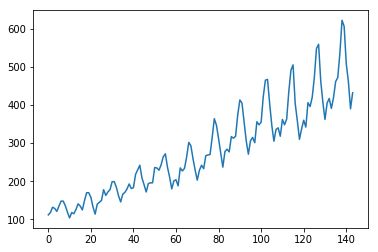

In [39]:
plt.plot(df.value);

### 3.绘制自相关图和偏自相关图

**绘制自相关图的函数：plot_acf**    

重要参数：    
> x：时间序列数据    
> ax：子图
> lags：限制横坐标显示的数量   
> alpha：置信区间（alpha=.05表示置信区间为95%，若alpha=None则不绘制置信区间）  
> title：图标标题，默认为'Autocorrelation'   
> zero：是否计算包含第一个数的自相关   
> vlines_kwargs：垂直线相关参数   

> 'unbiased=False'：布尔值，若为True，则自协方差的分母为n-k，否则为n    
> 'fft=False'：布尔值，若为True，则通过FFT计算ACF（FFT：快速傅立叶变换fast Fourier transform）

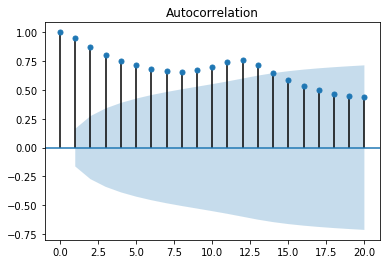

In [5]:
plot_acf(df.value
         ,lags=20
#          ,alpha=.05
#          ,use_vlines=False
#          ,zero=False
#          ,vlines_kwargs={'color':'b','linestyle':'dashdot','linewidth':1,'alpha':.6}
#          ,color='darkorange'
#          ,marker='*'
        );

**绘制偏自相关图的函数：plot_pacf**    

重要参数：    
> x：时间序列数据    
> ax：子图
> lags：限制横坐标显示的数量   
> alpha：置信区间（alpha=.05表示置信区间为95%，若alpha=None则不绘制置信区间）
> title：图标标题，默认为''Partial Autocorrelation'   
> zero：是否计算包含第一个数的自相关   
> vlines_kwargs：垂直线相关参数   

> method：'ywunbiased'（默认）   
>> yw/ywunbiased：具有偏差校正的yule walker，用于acovf的分母   
>> ywm/ywmle：没有偏差校正的yule walker   
>> ols：在滞后和常数上进行时间序列的回归   
>> ld/ldunbiased：带偏差校正的Levinson-Durbin递归   
>> ldb/ldbiased：不带偏差校正的Levinson-Durbin递归 

**尤尔一沃克方程(Yule-Walker equation)**是描述自回归序列参数与其协方差函数之间关系的方程。在统计和信号处理中，尤尔一沃克方程与自回归模型关系密切，是一种随机过程的表示，它用于描述自然界，经济学等中的某些时变过程。

Levinson-Durbin递归参考说明：https://ww2.mathworks.cn/help/signal/ref/levinson.html

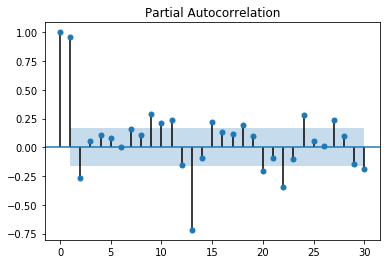

In [6]:
plot_pacf(df.value
         ,lags=30
#          ,alpha=.05
#          ,use_vlines=False
#          ,zero=False
        );

#### 绘制目标图形   

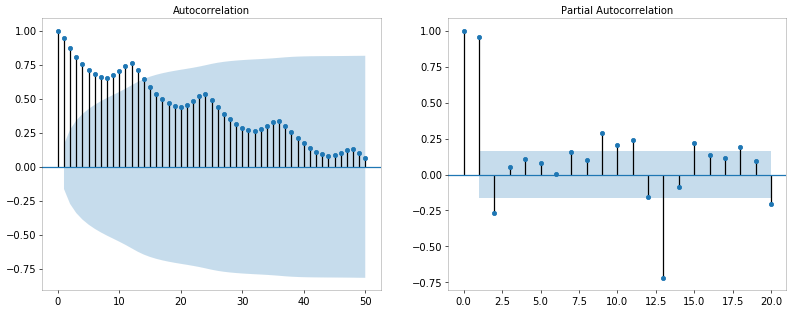

In [17]:
#创建画布
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6),dpi=60)   

#绘制图形
plot_acf(df.value,ax=ax1,lags=50) #自相关图
plot_pacf(df.value,ax=ax2,lags=20) #偏自相关图 

#弱化边框
sp = ['top','bottom','left','right']
for i in sp:
    ax1.spines[i].set_alpha(.3) #弱化子图1的边框
    ax2.spines[i].set_alpha(.3) #弱化子图2的边框  
    
#添加装饰    
ax1.tick_params(axis='both', labelsize=12) #设定子图1的刻度
ax2.tick_params(axis='both', labelsize=12) #设定子图2的刻度
plt.show()

#### 源码解读

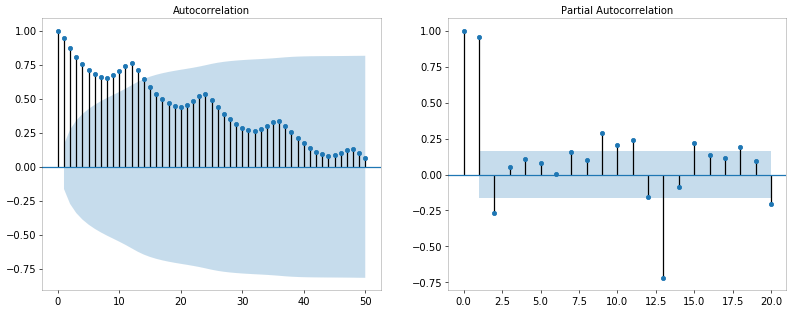

In [7]:
# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv') #导入数据集

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 60) #创建一张画布和两个子图
plot_acf(df.value.tolist(), ax=ax1, lags=50) #绘制自相关图
plot_pacf(df.value.tolist(), ax=ax2, lags=20)#绘制偏自相关图

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)       #弱化子图1和子图2的上边框
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3) #弱化子图1和子图2的下边框
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)   #弱化子图1和子图2的右边框
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)     #弱化子图1和子图2的左边框

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12) #设定子图1的刻度
ax2.tick_params(axis='both', labelsize=12) #设定子图2的刻度
plt.show() #本地显示图形

### 4.图像解读

自相关图（ACF图）显示时间序列与其自身滞后的相关性。   
在自相关图上，每条垂直线表示系列与滞后0之间的相关性。    
图中的蓝色阴影区域是显著性水平，那些位于蓝线之上的滞后是显著的滞后。   

那么如何解读呢？
对于空乘旅客，我们看到多达14个滞后跨越蓝线，因此非常重要。 这意味着，14年前的航空旅客交通量对今天的交通状况有影响。   
PACF在另一方面显示了任何给定滞后序列与当前序列的自相关，但是去掉了滞后的贡献。

### <font color=bule> 38/50 交叉相关图（Cross Correlation plot）  

交叉相关图显示了两个时间序列之间的相关关系。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E4%BA%A4%E5%8F%89%E7%9B%B8%E5%85%B3%E5%9B%BE.png' width=600>

### 1.导入相应的绘图包

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.tsa.stattools as stattools  

### 2.导入数据集

此数据集统计的是从1974年到1979年期间，英国每月因支气管炎，肺气肿和哮喘而死亡的人数   
特征为日期、男性死亡人数、女性死亡人数   

In [40]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

In [41]:
df.head()

,date,mdeaths,fdeaths
0,Jan 1974,2134,901
1,Feb 1974,1863,689
2,Mar 1974,1877,827
3,Apr 1974,1877,677
4,May 1974,1492,522


In [42]:
df.shape

(72, 3)

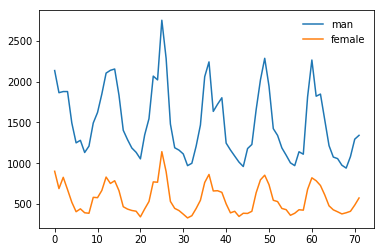

In [44]:
#探索原数据
plt.plot(df.mdeaths,label='man')
plt.plot(df.fdeaths,label='female')
plt.legend(frameon=False);

### 3.绘制交叉相关图

In [46]:
stattools.ccf(df.mdeaths, df.fdeaths) #计算两个时间序列之间的交叉相关系数

array([ 0.97624125,  0.74603006,  0.37464875, -0.01113989, -0.40544536,
       -0.66883377, -0.75113293, -0.67633918, -0.43125559, -0.02069951,
        0.45520617,  0.77499397,  0.86567668,  0.77992398,  0.44857567,
       -0.00427632, -0.37851576, -0.65935527, -0.7983207 , -0.73099575,
       -0.46666178, -0.05366402,  0.37389739,  0.79257813,  0.95522608,
        0.80760227,  0.45887346,  0.042412  , -0.38446007, -0.64856949,
       -0.76551299, -0.75223759, -0.54038568, -0.13669633,  0.36233231,
        0.7150268 ,  0.84863502,  0.72924617,  0.4238075 ,  0.05216286,
       -0.35928919, -0.64150057, -0.82579344, -0.81586446, -0.6188645 ,
       -0.18803659,  0.21050648,  0.60212996,  0.75763278,  0.6510551 ,
        0.41560064,  0.05754465, -0.29854881, -0.5524216 , -0.73614681,
       -0.77758294, -0.59543994, -0.18239377,  0.15294809,  0.50874631,
        0.74232138,  0.51732832,  0.34563495,  0.04223246, -0.31191072,
       -0.62767461, -0.82745419, -0.98125958, -1.02341607, -0.90

- 在零相关的零假设下，交叉相关系数的方差大约为1/n
- 如果置信水平为5%，则近似临近值±$2/\sqrt n$   
ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128

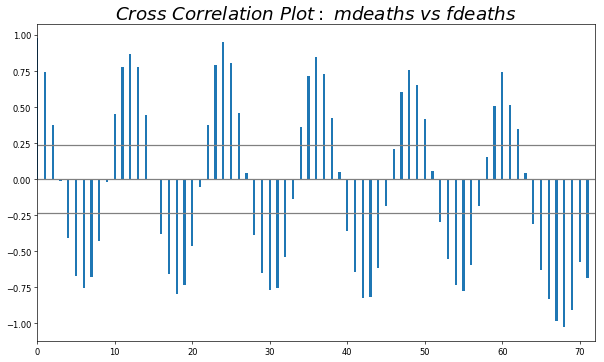

In [60]:
#绘制交叉相关图

#数据处理
ccs = stattools.ccf(df.mdeaths, df.fdeaths) #计算两个时间序列之间的交叉相关系数
conf_level = 2/np.sqrt(len(ccs))  #计算置信水平

#绘制图形
plt.figure(figsize=(12,7),dpi=60) #创建画布
plt.bar(x=range(len(ccs)),height=ccs,width=.3) #绘制交叉相关系数的条形图
plt.hlines(0,xmin=0,xmax=len(ccs),color='gray')#绘制中心线
plt.hlines(conf_level,xmin=0,xmax=len(ccs),color='gray') #绘制置信水平上界
plt.hlines(-conf_level,xmin=0,xmax=len(ccs),color='gray') #绘制置信水平下界

#添加装饰
plt.title('$Cross\ Correlation\ Plot:\ mdeaths\ vs\ fdeaths$',fontsize=22)
plt.xlim(0,len(ccs));

#### 源码解读

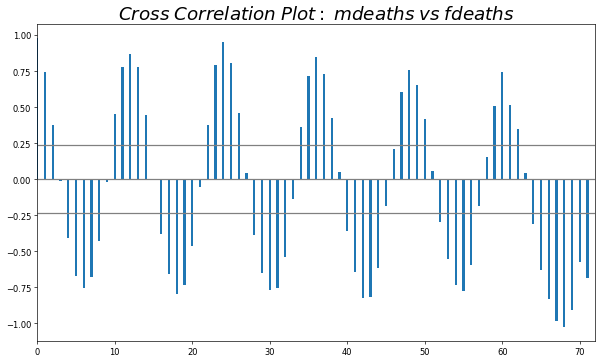

In [48]:
# Import Data
# df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv') #导入数据集
x = df['mdeaths'] #提取男性死亡数时间序列
y = df['fdeaths'] #提取女性死亡数时间序列

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100] #计算两个序列之间的交叉相关系数（这里的[:100]截取前100个数并没起到什么作用，源数据总共就72条数据）
nlags = len(ccs) #计算交叉相关系数的长度

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags) #计算置信水平

# Draw Plot
plt.figure(figsize=(12,7), dpi= 60) #创建画布

plt.hlines(0, xmin=0, xmax=100, color='gray')  #绘制中心线
plt.hlines(conf_level, xmin=0, xmax=100, color='gray') #绘制置信水平上界
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')#绘制置信水平下界

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3) #绘制交叉相关系数条形图

# Decoration
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22) #添加标题并设定字体大小
plt.xlim(0,len(ccs)) #设定X轴刻度范围
plt.show() #本地显示图形

### 4.图像解读